# Вступление

<b>Описание проекта:</b><br> 
Федеральный оператор сотовой связи предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.<br>
<b>Цель проекта:</b> определить, какой тариф приносит большую выручку и получить рекомендации для проведения рекламной кампании <br>
<p>
<b>Задачи проекта:</b><br>
1. Провести предварительный анализ данных в таблицах с целью выявления явных ошибок в данных<br>
2. Проанализировать поведение пользователей обоих тарифов: каким образом используют пакет услуг: полностью, частично, как и насколько много пользуются услугами сверх пакета, какой тариф приносит большую прибыль?
3. Проверить гипотезу о неравенстве средней прибыли между пользователями тарифов Smart и Ultra.
4. Сделать общий вывод о том, какой тариф более выгоден компании и сформиулировать некоторые рекомндации для проведения рекламной кампании
</p>
<br>
<p>
<b>Краткое описание данных</b><br>
В задаче предстоит проанализировать следующие наборы данных:<br>
Таблица tariffs: информация о тарифах компании: абонентская плата, количество минут/ сообщений/Гб, которые входят в пакет, а также стоимость использовния этих услуг сверх пакета<br>
Таблица users: информация о пользователях: иднетификатор, ФИО, тариф, город, дата начала использования тарифа и дата прекращения пользования тарифом<br>
Таблица calls: информация о звонках, сделанных пользователями: дата, продолжительность, идентификатор пользователя<br>
Таблица messages: информация о сообщениях, отправленных пользователями: дата, идентификатор пользователя<br>
Таблица internet: информация об использованном трафике: дата, объем трафика в Мб, идентифкатор пользователя
</p>

<h2>Предобработка данных</h2>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import calendar

In [3]:
#Открываем файлы, создаем датасеты
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

#Выведем несколько строк каждого датасета
print('Таблица Calls:')
display(calls.head(10))
print()
print('Таблица internet:')
display(internet.head(10))
print()
print('Таблица messages:')
display(messages.head(10))
print()
print('Таблица tariffs:')
display(tariffs.head(10))
print()
print('Таблица users:')
display(users.head(10))
print()


Таблица Calls:


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000



Таблица internet:


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000



Таблица messages:


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000



Таблица tariffs:


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Таблица users:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<b>Вывод</b><br>
Загружены данные всех таблиц, используемых в поставленной задаче. На первый взгляд все данные выглядят корректно, хотя в глаза бросается большое количество пропущенных значений в столбце churn_date таблицы users, однако, согласно описанию данных, это может означать то, что на момент выгрузки пользователь все еще пользовался данным тарифом. <br>
В таблице internet обнаружен лишний столбец, которого нет в описании - Unnamed: 0. С первого взгляда похоже, что он просто дублирует индексы. Но это необходимо проверить.
Таблицы messages, internet и calls в целом имеют похожую структуру: для их обработки можно применять ряд общих функций
В любом случае, с целью удобства, наглядности и избежания ошибок, данные в каждой таблице лучше обрабатывать отдельно, что и сделано ниже

<h3>Предварительная обработка таблицы tariffs</h3>

In [4]:
#Выведем общую информацию о таблице tariffs 
print(tariffs.info())
#выведем данные таблицы tariffs:
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<b>Вывод о данных таблицы tariffs</b><br>
Таблица содержит всего 2 записи, нет пропущенных значений. Все числовые столбцы типа int, что удобно потом использовать для сравнения и прочих операций. Таблица в изменениях и доработке не нуждается.

 <h3>Предварительная обработка таблицы users</h3>

In [5]:
#Выведем общую информацию о таблице users 
print(users.info())
#выведем первые 5 строк таблицы users:
print(users.head(5))
#Выведем несколько строк (3), где churn_date не NaN. Это необходимо, чтобы посмотреть формат даты в этом столбце
print(users.sort_values(by = 'churn_date', ascending = False).head(3))
#преобразуем типы данных в столбцах reg_date и churn_date в тип datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
# Выведем крайние даты регистрации и завершения пользования тарифом
print('Самая ранняя дата регистрации: {}'.format(users['reg_date'].min()))
print('Самая поздняя дата регистрации: {}'.format(users['reg_date'].max()))

print('Самая ранняя дата завершения пользования тарифом: {}'.format(users['churn_date'].min()))
print('Самая поздняя дата завершения пользования тарифом: {}'.format(users['churn_date'].max()))
#Проверим, есть ли такие строки, где тарифом завершили пользоваться раньше, чем начали (откровенные ошибки в данных)
print('Количество строк, где дата завершения пользовния тарифом меньше либо равна дате начала: {}'.format(len(users.query('churn_date <= reg_date'))))

print()

#С целью поиска дубликатов приведем все строковые значения к единому регистру:
users['city'] = users['city'].str.lower()
users['tariff'] = users['tariff'].str.lower()
users['first_name'] = users['first_name'].str.lower()
users['last_name'] = users['last_name'].str.lower()
print('уникальные значения в столбце city')
print(users.city.sort_values().unique())
print('уникальные значения в столбце first_name')
print(users.first_name.sort_values().unique())
print('уникальные значения в столбце last_name')
print(users.last_name.sort_values().unique())
print('уникальные значения в столбце tariff')
print(users.tariff.sort_values().unique())

print()

#выведем количество дубликатов строк:
print('Количество дубликатов в таблице: {}'.format(users.duplicated().sum()))
print('Количество дубликатов в столбце user_id: {}'.format(users['user_id'].duplicated().sum()))
print()
print()
print('Общая информация о таблице users после преобразования типов данных')
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra  
     user_id  age  churn_date    city firs

<b>Вывод</b><br/>
В таблице обнаружено большое количество пропущенных значений в столбце churn_date (практически все значения), однако, согласно описанию данных, это означает лишь то, что на момент выгрузки пользователь все еще пользовался тарифом. Это означает, что нет смысла каким-то образом заменять отсутсвующие значения. Их можно заменить лишь на значения по умолчанию, но на данном этапе пока не вижу смысла в этом<br>
В таблице обнаружено два столбца (churn_date, reg_date), содержащие даты. Их тип данных был изменен с object на datetime. Проверено, что в таблице нет строк, где churn_date <= reg_date (то есть нет очевидных ошибок дат, где дата завершения пользования тарифом - более ранняя или равна, чем дата начала пользования). Все даты в выборке - за 2018 год. для всех остальных таблиц стоит проверить, нет ли сообщений, регистраций трафика и звонков за пределами этих дат для всех пользователей.
Для избежания ошибок,связанных с наисанием, столюцы city, first_name и last_name были приведены к нижнему регистру и выведены уникальые значения каждого столбца. Данные выглядят корректно.<br>

Дубликатов в таблице обнаружено не было, как и в столбце user_id (проверка на задвоение идентификатора пользователя).


<h3>Предварительная обработка таблицы messages</h3>

In [6]:
#Таблицы messages, internet, calls имеют схожую структуру, большинство данных обрабатываются похожим образом. Создадим функцию по обработке таких данных
def basic_prepare_info(array,date_column,user_id_column):
    #Выведем общую информацию о таблице  
    print('Общая информация о таблице')
    print(array.info())
    #выведем первые 5 строк таблицы:
    print(array.head(5))
    #Преобразуем тип данных столбца date_column в datetime
    array[date_column] = pd.to_datetime(array[date_column], format = '%Y-%m-%d')
    #Посчитаем количество дубликатов:
    print('Количество дубликатов в таблице: {}'.format(array.duplicated().sum()))
    print('Количество уникальных значений в поле id: {}'.format(len(array[user_id_column].unique())))
    #Выведем даты самого раннего и самого позднего сообщений/звонков/исп. трафика с целью выявления явных ошибок в датах:
    print('Самое раннее действие в выборке: {}'.format(array[date_column].min()))
    print('Самое позднее действие в выборке: {}'.format(array[date_column].max()))
    print()

#Определим функцию, которая поможет определить, если ли ошибочные значения в датах: сообщение/звонок/трафик зарегистрированы вне периода пользования тарифом
def dates_erros_checkin(array,date_col):
    #объединим таблицу с таблицей users
    merged_array = users[['user_id','reg_date','churn_date']].set_index('user_id').merge(array, right_on = 'user_id', left_on = 'user_id', how = 'outer') 
    #Выведем первые 5 строк объединенной таблицы
    print('Первые 5 строк объединенной таблицы для контроля корректности дат совершенных действий')
    print(merged_array.head(5))
    #Проверим, есть ли в объединенной таблице строки , где есть ошибки в датах(дата совершения действия выходит за пределы времени пользования тарифом)
    query_string = date_col + ' < reg_date'
    print('Количество строк, где '+date_col+' < reg_date: {}'.format(len(merged_array.query(query_string))))
    query_string = date_col + ' > churn_date'
    print('Количество строк, где '+date_col+' > churn_date: {}'.format(len(merged_array.query(query_string))))

    
#Вызовем функцию basic_prepare_info для messages. Выведем общую информацию о таблице после преобразования данных    
basic_prepare_info(messages,'message_date','id') 
#Вызовем функцию для проверки корректности дат сообщений
dates_erros_checkin(messages,'message_date')
print()
print('Общая информация о таблице messages после преобразования типов данных')
print(messages.info())

Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000
Количество дубликатов в таблице: 0
Количество уникальных значений в поле id: 123036
Самое раннее действие в выборке: 2018-01-02 00:00:00
Самое позднее действие в выборке: 2018-12-31 00:00:00

Первые 5 строк объединенной таблицы для контроля корректности дат совершенных действий
   user_id   reg_date churn_date      id message_date
0     1000 2018-05-25        NaT  1000_0   2018-06-27
1     1000 2018-05-25        NaT  1000_1   2018-10-08
2     1000 2018-05-25        NaT  1000_2   2018-08-04
3    

<b>Вывод</b><br/>
В таблице messages было обнаружено, что существует столбец (message_date), содержащий данные о дате отправки сообщения и его тип данных - object. тип данных был преобразован в datetime. <br>
В столбце id проверено количество уникальных значений (это поле - не идентификатор в датафрейме, возможны ошибки, связанные с задвоением). Количество уникальных значений равно количеству строк в таблице, значит, ошибок в этом столбце нет<br>
С целью проверки наличия ошибок в датах сообщений найдены даты самого раннего и самого позднего сообщений в выборке. Все данные за 2018 год, ошибок быть не должно, но с остальными датасетами сравнить также необходимо<br>
Проверено, что не существует зарегистриванных сообщений вне периода пользования тарифом
Пропусков или иных несостыковок в данных обнаружено не было

<h3>Предварительная обработка табылицы internet</h3>

In [7]:
#Вызовем функцию basic_prepare_info для internet. Выведем общую информацию о таблице после преобразования данных    
basic_prepare_info(internet,'session_date','id')
#Переименуем столбцы таблицы internet и посчитаем количество строк, где значения в столбце Unnamed: 0 (переименовано в unnamed) равно индексу
try:
    internet.set_axis(['unnamed','id','mb_used','session_date','user_id'], axis = 'columns', inplace = True)
    print()
    print('Количество строк, где значение столбца unnamed равно значению индекса: {}'.format(len(internet.query('unnamed == index'))))
    print()
    #удалим столбец unnamed за ненадобностью
    internet = internet.drop('unnamed',1)
except:
    print('Уже заменены все названия столбцов')
#Вызовем функцию для проверки корректности дат сообщений
dates_erros_checkin(internet,'session_date')

#Проверим минимальное и максимальное значенив столбце mb_used
print()
print('Минимальное значание в столбце mb_used: {}'.format(internet['mb_used'].min()))
print('Максимальное значание в столбце mb_used: {}'.format(internet['mb_used'].max()))
#Посчитаем количество и долю строк с нулевым значением mb_used
print('Количество строк с нулевым значением mb_used: {}'.format(len(internet.query('mb_used == 0'))))
print('Доля строк с нулевым значением mb_used: {}'.format(len(internet.query('mb_used == 0'))/len(internet)))
#Удалим строки с нулевы значением mb_used: таблица, по сути, содержит только данные об объеме использованного трафика. Здесь же объем нулевой. 
try:
    internet.drop(internet[internet.mb_used == 0].index, inplace = True)
except:
    print('Строки уже удалены')
print()
#округлим вверх значения использованных мегабайтов (в соответствии с ценовой политикой компании) и заменим тип данных
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')
print('Общая информация о таблице messages после преобразования типов данных')
print(internet.info())

Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2           2  1000_2  1197.26   2018-06-25     1000
3           3  1000_3   550.27   2018-08-22     1000
4           4  1000_4   302.56   2018-09-24     1000
Количество дубликатов в таблице: 0
Количество уникальных значений в поле id: 149396
Самое раннее действие в выборке: 2018-01-01 00:00:00
Самое позднее действие в выборке: 2018-12-31 00:00:00


Количество строк, где значение столбца unnamed равно значению индекса: 149396

Первые 5 стр

<b>Вывод</b><br>
Тип данных столбца session_date заменен на datetime.<br>
В таблице не обнаружено дубликатов. Значения в столбце id уникальны. Все действия датируются 2018 годом (что соответствует данным предыдущих таблиц). Таблица не содержит записей с явными ошибками в датах (все даты session_date находятся в пределах периодов пользования тарифами)<br>
В таблице был обнаружен столбец Unnamed: 0, по сути, дублирующий индексы. Об этом необходимо сообщить в отдел разработки. Данный столбец был удален.
В таблице было обнаружено более 13% строк, с нулевым значением mb_used (объем используемого трафика). Вероятно, это ситуации, когда пользователи не смогли зайти в интернет, хотя и хотели, это могло произойти по разным причинам, в том числе по причине плохой связи. В таком случае об этих достаточно больших по объему данных необходимо сообщить в отдел разработки (на предмет проверки ошибок), а также в отдел по контролю качества предоставляемых услуг. В текущей задаче строки, где количество используемых мегабайт - нулевое, нас не интересуют, поэтому они были удалены (тем более, что они могут повлиять на описательные статистики в сторону уменьшения, чего допускать не хотелось бы). Все остальные, даже самые минимальные значения можно считать значимыми: для многих операторов даже сообщения в мессенджерах учитываются в интернет-трафике, а они бывают очень небольшого объема.<br>
Согласно политике компании, количество использованных мегабайт всегда округляется вверх. Осуществлено округление данных и тип данных в столбце mb_used заменен на int

<h3>Предварительная обработка таблицы Calls</h3>

In [8]:
#Вызовем функцию basic_prepare_info для Calls. Выведем общую информацию о таблице после преобразования данных    
basic_prepare_info(calls,'call_date','id')
#Вызовем функцию для проверки корректности дат сообщений
dates_erros_checkin(calls,'call_date')
#Посчитаем количество и долю строк с нулевым значением duration
print()
print('Количество строк с нулевым значением duration: {}'.format(len(calls.query('duration == 0'))))
print('Доля строк с нулевым значением duration: {}'.format(len(calls.query('duration == 0'))/len(calls)))
print()
#округлим вверх значения использованных минут (в соответствии с ценовой политикой компании) и заменим тип данных
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
print('Общая информация о таблице messages после преобразования типов данных')
print(calls.info())

Общая информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
Количество дубликатов в таблице: 0
Количество уникальных значений в поле id: 202607
Самое раннее действие в выборке: 2018-01-01 00:00:00
Самое позднее действие в выборке: 2018-12-31 00:00:00

Первые 5 строк объединенной таблицы для контроля корректности дат совершенных действий
   user_id   reg_date churn_date      id  call_date  duration
0     1000 2018-05-25        NaT  1000_0 2018-07-25      0.00
1  

<b>Вывод</b><br>
Тип данных столбца call_date заменен на datetime.<br>
В таблице не обнаружено дубликатов. Значения в столбце id уникальны. Все звонки датируются 2018 годом (что соответствует данным предыдущих таблиц). Таблица не содержит записей с явными ошибками в датах (все даты call_date находятся в пределах периодов пользования тарифами)<br>
Согласно политике компании, количество использованных минут всегда округляется вверх. Осуществлено округление данных и тип данных в столбце duration заменен на int<br>
В столбце duration 19,5% записейй - нулевые. Максимально вероятно, что это просто неотвеченные звонки. Тем не менее, эти данные показывают некоторую активность пользователей и могут быть полезны при подсчете количества исходящих звонков, поэтому на данном этапе принято оставить эти строки. Эти значения, бесусловно, повлияют на резулльтат при подсчете описательных статистик (среднего, например), но в таких случаях можно просто сделать выборку

<h3>Расчет количества сделанных звонков и израсходованных минут по месяцам, количества отправленных сообщений и объема ихрасходованного интернет-трафика по месяцам</h3>

<h4>Расчет количества сделанных звонков и израсходованных минут по месяцам по каждому пользователю</h4>

In [9]:
def find_month_name(month_nmb): #Функция, возвращающая наименование месяца по его номеру
    return calendar.month_name[month_nmb]
#функция для добавления столбца с наименованием месяца в таблице и создания сводной таблицы по заданным значениям и функциям
def find_month_name_full(month_nmb):#Функция, возвращающая наименование месяца вместе с номером (для удобной сортировки в дальейшем)
    month_name = ''
    if month_nmb < 10:#если номер месяца меньше 10, добавляем вначале 0
        month_name = '0'
    month_name  = month_name + str(month_nmb) + ' - ' + find_month_name(month_nmb) #формируем полное имя месяца
    return month_name
    
def pivot_array(array,old_date,new_date,value, aggfuncs):
    #Добавим столбец с номером месяца операции и изменим числовое значение на наименование месяца
    array['month_number'] = array[old_date].dt.month
    #month_nmb = array[help_col]
    array[new_date] = array['month_number'].apply(find_month_name_full)
    #print(array[help_col],'  ---  ',array[help_col2])
    #array[new_date] = month_name
    #создание сводной таблицы 
    array_pivot = array.pivot_table(index=['user_id',new_date], values = value, aggfunc=aggfuncs, fill_value = 0)
    return array_pivot

#Рассчитаем для удобства понимания в дальнейшем количество пользователей кажого тарифа:
print('Количество пользователей тарифа Smart:',users.query('tariff == "smart"').shape[0])
print('Количество пользователей тарифа Ultra:',users.query('tariff == "ultra"').shape[0])
#print('Количество пользователей тарифа Ultra:',users.query('tariff = "ultra"')[.count()])

#Создадим сводную таблицу на основании таблицы Calls. Посчитаем количество вызовов и их общую длительность по месяцам для каждого пользователя    
calls_pivot = pivot_array(calls,'call_date','call_month','duration',['sum','count'])
#calls_pivot = calls_pivot.apply()
#Переименуем столбцы сводной таблицы
calls_pivot.columns = ['sum_duration','count_duration']
#Выведем сводную таблицу на экран
calls_pivot.head(10)



Количество пользователей тарифа Smart: 351
Количество пользователей тарифа Ultra: 149


sum_duration  count_duration
user_id call_month                                  
1000    05 - May                 159              22
        06 - June                172              43
        07 - July                340              47
        08 - August              408              52
        09 - September           466              58
        10 - October             350              57
        11 - November            338              43
        12 - December            333              46
1001    11 - November            430              59
        12 - December            414              63

<h4>Расчет количества отправленных сообщений по каждому пользователю по месяцам</h4>

In [10]:
#Создадим сводную таблицу на основании таблицы messages. Посчитаем количество сообщений по месяцам для каждого пользователя    
messages_pivot = pivot_array(messages,'message_date','message_month','id','count')
messages_pivot.columns = ['count_messages']
messages_pivot.head(10)

count_messages
user_id message_month                 
1000    05 - May                    22
        06 - June                   60
        07 - July                   75
        08 - August                 81
        09 - September              57
        10 - October                73
        11 - November               58
        12 - December               70
1002    06 - June                    4
        07 - July                   11

<h4>Расчет объема использованного интернет-тафика по каждому пользователю по месяцам</h4>

In [11]:
#Создадим сводную таблицу на основании таблицы internet. Посчитаем объем трафика по месяцам для каждого пользователя    
internet_pivot = pivot_array(internet,'session_date','session_month','mb_used','sum')
internet_pivot.columns = ['sum_mb_used']
internet_pivot.head(10)

sum_mb_used
user_id session_month              
1000    05 - May               2256
        06 - June             23257
        07 - July             14016
        08 - August           14070
        09 - September        14581
        10 - October          14717
        11 - November         14768
        12 - December          9827
1001    11 - November         18452
        12 - December         14053

<h4>Подсчет выручки по каждому клиенту по месяцам</h4>

In [11]:
def count_calls_extrapay(row):
    minutes_included = row[2] #количество минут, включенных в тариф
    rub_per_minute = row[6] # доплата за минуты
    total_calls = row[10] # всего звонков (сделал пользовтель в месяц)
    calls_extrapay = 0 #доплата за звонки
    if total_calls > minutes_included:# если израсходовано больше минут, чем по тарифу, считаем доплату 
        calls_extrapay = (total_calls - minutes_included) * rub_per_minute
    return calls_extrapay
def count_messages_extrapay(row):
    messages_included = row[0] #количество сообщений, включенных в тариф
    rub_per_message = row[5] # доплата за сообщения
    total_messages = row[12] # всего сообщений (отправил пользовтель в месяц)
    messages_extrapay = 0 #доплата за сообщения
    if total_messages > messages_included:# если израсходовано больше сообщений, чем по тарифу, считаем доплату 
        messages_extrapay = (total_messages - messages_included) * rub_per_message
    return messages_extrapay

def count_internet_extrapay(row):
    mb_per_month_included = row[1] #количество мегабайт, включенных в тариф
    rub_per_gb = row[4] # доплата за гигабайты
    total_mb = row[13] #всего МБ (израсходовал пользователь в месяц)
    internet_extrapay = 0 #доплата за ГБ
    if total_mb > mb_per_month_included: # если израсходовано больше МБ, чем по тарифу, считаем доплату 
        internet_extrapay = ((total_mb - mb_per_month_included) / 1024) * rub_per_gb 
    return internet_extrapay
    

def count_profit_func(row): #функция для подсчета выручки по каждой строке
    messages_included = row[0] #количество сообщений, включенных в тариф
    mb_per_month_included = row[1] #количество мегабайт, включенных в тариф
    minutes_included = row[2] #количество минут, включенных в тариф
    rub_money_fee = row[3] #абонентская плата
    rub_per_gb = row[4] # доплата за гигабайты
    rub_per_message = row[5] # доплата за сообщения
    rub_per_minute = row[6] # доплата за минуты
    total_calls = row[10] # всего звонков (сделал пользовтель в месяц)
    total_messages = row[12] # всего сообщений (отправил пользовтель в месяц)
    total_mb = row[13] #всего МБ (израсходовал пользователь в месяц)
    calls_extrapay = 0 #доплата за звонки
    messages_extrapay = 0 #доплата за сообщения
    internet_extrapay = 0 #доплата за ГБ
    if total_calls > minutes_included:# если израсходовано больше минут, чем по тарифу, считаем доплату 
        calls_extrapay = (total_calls - minutes_included) * rub_per_minute
    if total_messages > messages_included:# если израсходовано больше сообщений, чем по тарифу, считаем доплату 
        messages_extrapay = (total_messages - messages_included) * rub_per_message
    if total_mb > mb_per_month_included: # если израсходовано больше МБ, чем по тарифу, считаем доплату 
        internet_extrapay = ((total_mb - mb_per_month_included) / 1024) * rub_per_gb 
    #total_activity['calls_extrapay'] = calls_extrapay
    
    total_payment = rub_money_fee + calls_extrapay + messages_extrapay + internet_extrapay #сумма платежа в месяц  
    return  total_payment
        
#создаем таблицу total_activities, где для каждого пользователя будем хранить и количество и длительность звонков, и количество сообщений, и объем трафика по месяцам
total_activity = calls_pivot.join([messages_pivot,internet_pivot],how='outer')
total_activity_indexes = total_activity.index.to_frame()
total_activity_indexes.columns = ['user_id','month']
total_activity = total_activity.join(total_activity_indexes)

#Добавляем в total_activities данные о тарифах и городе для каждого пользователя
total_activity = users[['user_id','city','tariff']].set_index('user_id').merge(total_activity, right_on = 'user_id', left_on = 'user_id', how = 'outer') 
total_activity = tariffs.set_index('tariff_name').merge(total_activity, right_on = 'tariff', left_on = 'tariff_name', how = 'outer')

#зануляем все пропущенные значения (их отсутсвие как раз и означает, что действий не было)
total_activity['sum_duration'].fillna(0, inplace = True)
total_activity['count_duration'].fillna(0, inplace = True)
total_activity['count_messages'].fillna(0, inplace = True)
total_activity['sum_mb_used'].fillna(0, inplace = True)


#округляем вверх значения в столбцах sum_mb_used и sum_duration согласно политике компании
total_activity['sum_mb_used'] = total_activity['sum_mb_used'].apply(np.ceil)
total_activity['sum_duration'] = total_activity['sum_duration'].apply(np.ceil)
#Считаем доплату за звонки в месяц по каждому клиенту
total_activity['calls_extrapay'] = total_activity.apply(count_calls_extrapay, axis = 1)
total_activity['calls_extrapay'] = total_activity['calls_extrapay'].apply(np.round)

#Считаем доплату за сообщения в месяц по каждому клиенту
total_activity['messages_extrapay'] = total_activity.apply(count_messages_extrapay, axis = 1)
total_activity['messages_extrapay'] = total_activity['messages_extrapay'].apply(np.round)

#Считаем доплату за интернет в месяц по каждому клиенту
total_activity['internet_extrapay'] = total_activity.apply(count_internet_extrapay, axis = 1)
total_activity['internet_extrapay'] = total_activity['internet_extrapay'].apply(np.round)


#считаем ежемесячную выручку по каждоу клиенту и округляем значения
total_activity['total_proficit'] = total_activity.apply(count_profit_func, axis = 1)
total_activity['total_proficit'] = total_activity['total_proficit'].apply(np.round)
#Уберем ненужные вспомогательные днные
total_activity_short = total_activity[['user_id','city','tariff','month','sum_duration','count_duration','count_messages','sum_mb_used','total_proficit']]
#print(total_activity_short.info())
total_activity_short.head(10)


,user_id,city,tariff,month,sum_duration,count_duration,count_messages,sum_mb_used,total_proficit
0,1001,москва,smart,11 - November,430.0,59.0,0.0,18452.0,1154.0
1,1001,москва,smart,12 - December,414.0,63.0,0.0,14053.0,550.0
2,1002,стерлитамак,smart,06 - June,117.0,15.0,4.0,10871.0,550.0
3,1002,стерлитамак,smart,07 - July,214.0,26.0,11.0,17601.0,988.0
4,1002,стерлитамак,smart,08 - August,289.0,42.0,13.0,20347.0,1524.0
5,1002,стерлитамак,smart,09 - September,206.0,36.0,4.0,16712.0,814.0
6,1002,стерлитамак,smart,10 - October,212.0,33.0,10.0,13905.0,550.0
7,1002,стерлитамак,smart,11 - November,243.0,32.0,16.0,18610.0,1185.0
8,1002,стерлитамак,smart,12 - December,236.0,33.0,12.0,18137.0,1092.0
9,1005,набережные челны,smart,01 - January,95.0,15.0,7.0,2730.0,550.0


<B>Вывод</B>

Для каждого клиента рассчитаны по месяцам количество и общая длительность исходящих вызовов, количество отправленных сообщений и объем трафика. На основании этих данных рассчитана выручка по каждому клиенту по месяцам. Для упрощения задач дальнейшего ананлиза в таблицу добавлен столбцы "город" и "тариф". Все пропущенные значения в объединенной таблице заменены нулями: так как их отсутсвие может означать, что такого действия пользователь в течение месяца не производил (не отправлял сообщения, не звонил, не пользовался трафиком)<br>
Данные подготовлены для дальнейшего анализа, который будет произведен далее

<h2>Анализ поведения клиентов</h2>

Аналитика для общей выручки

Расчет параметра " общая выручка " для тарифа  Smart :

Описательная статистика для параметра " общая выручка " по тарифу  Smart  по месяцам:
       total_proficit
count       12.000000
mean    229095.750000
std     154234.350492
min      23887.000000
25%      99004.500000
50%     211656.000000
75%     329728.000000
max     507483.000000
общая выручка  по тарифу  Smart  за год: 2749699.0
общая выручка  ежемесячно по тарифу  Smart :
                total_proficit
month                         
01 - January           23887.0
02 - February          46650.0
03 - March             86118.0
04 - April            103300.0
05 - May              161720.0
06 - June             188528.0
07 - July             234784.0
08 - August           295749.0
09 - September        311762.0
10 - October          383626.0
11 - November         405542.0
12 - December         507483.0

Расчет параметра " общая выручка " для тарифа  Ultra :

Описательная статистика для параметра " обща

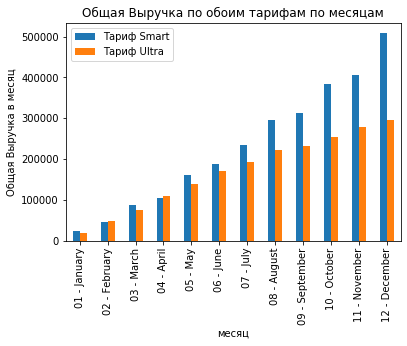

Расчет параметра " средняя выручка " для тарифа  Smart :

Описательная статистика для параметра " средняя выручка " по тарифу  Smart  по месяцам:
       total_proficit
count       12.000000
mean      1130.323624
std        223.775612
min        702.558824
25%       1069.392045
50%       1158.820289
75%       1264.719977
max       1505.884273
средняя выручка  по тарифу  Smart  за год: 2749699.0
средняя выручка  ежемесячно по тарифу  Smart :
                total_proficit
month                         
01 - January        702.558824
02 - February       804.310345
03 - March         1118.415584
04 - April          922.321429
05 - May           1146.950355
06 - June          1149.560976
07 - July          1168.079602
08 - August        1258.506383
09 - September     1199.084615
10 - October       1304.850340
11 - November      1283.360759
12 - December      1505.884273

Расчет параметра " средняя выручка " для тарифа  Ultra :

Описательная статистика для параметра " средняя выручка " по та

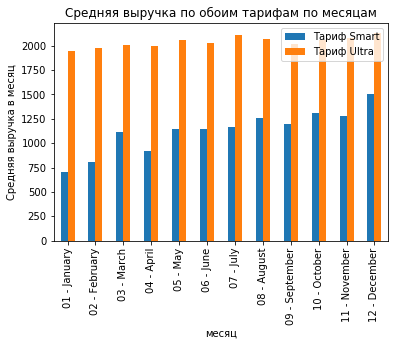

In [12]:
#Сравним для начлала сумму выручки ппо каждому тарифу по месяцам
def grouped_array_info(array, grouped_array,groupby,counted_column,aggfunc,tariff,rus_meaning): #функция для вывода описательной статистики, общей суммы и ежемесячно суммы заданного параметра 
    print('Расчет параметра "',rus_meaning,'" для тарифа ', tariff,':')
    print()
    print('Описательная статистика для параметра "',rus_meaning,'" по тарифу ', tariff,' по месяцам:')
    print(grouped_array.describe())
    print(rus_meaning,' по тарифу ', tariff,' за год: {}'.format(array[counted_column].sum().sum()))
    print(rus_meaning,' ежемесячно по тарифу ', tariff,':')
    print(grouped_array)
    print()
    


#Разделяем полученные данные для каждого тарифа в отдельный датафрейм и делаем группировку для каждого, где считаем сумму выручки по месяцам:
total_smart = total_activity_short.query('tariff == "smart"') 
total_ultra = total_activity_short.query('tariff == "ultra"')

print("Аналитика для общей выручки")
print()

#создаем группировки по месяцам для каждого тарифа и выводим описательную статистику и общую сумму для аждой тблицы
smart_proficit_grouped_by_month = total_smart.groupby('month').agg({'total_proficit':'sum'})
grouped_array_info(total_smart, smart_proficit_grouped_by_month,'month','total_proficit','sum','Smart','общая выручка')

ultra_proficit_grouped_by_month = total_ultra.groupby('month').agg({'total_proficit':'sum'})
grouped_array_info(total_ultra, ultra_proficit_grouped_by_month,'month','total_proficit','sum','Ultra','общая выручка')


#формируем объединенный датафрейм для сравненя выручки по месяцам
compare_proficit = smart_proficit_grouped_by_month.join(ultra_proficit_grouped_by_month, lsuffix = '_smart', rsuffix = '_ultra')
#строим столбчатую диаграмму сравнения выручки по месяцам для каждого тарифа
bar=compare_proficit.plot(kind = 'bar')
bar.set_xlabel('месяц')
bar.set_ylabel('Общая Выручка в месяц')
bar.set_title('Общая Выручка по обоим тарифам по месяцам')
plt.legend(['Тариф Smart', 'Тариф Ultra'])
plt.show()

#создаем группировки по месяцам для каждого тарифа и выводим описательную статистику и общую сумму для аждой тблицы
smart_proficit_grouped_by_month = total_smart.groupby('month').agg({'total_proficit':'mean'})
grouped_array_info(total_smart, smart_proficit_grouped_by_month,'month','total_proficit','mean','Smart','средняя выручка')

ultra_proficit_grouped_by_month = total_ultra.groupby('month').agg({'total_proficit':'mean'})
grouped_array_info(total_ultra, ultra_proficit_grouped_by_month,'month','total_proficit','mean','Ultra','средняя выручка')

print()
print("Аналитика для средней выручки")
print()

#формируем объединенный датафрейм для сравненя средней выручки по месяцам
compare_proficit = smart_proficit_grouped_by_month.join(ultra_proficit_grouped_by_month, lsuffix = '_smart', rsuffix = '_ultra')
#строим столбчатую диаграмму сравнения выручки по месяцам для каждого тарифа
bar=compare_proficit.plot(kind = 'bar')
bar.set_xlabel('месяц')
bar.set_ylabel('Средняя выручка в месяц')
bar.set_title('Средняя выручка по обоим тарифам по месяцам')
plt.legend(['Тариф Smart', 'Тариф Ultra'])
plt.show()

<b>Вывод</b><br>
Как можно вижеть на гистограмме, ежемесячная выручка тарифа Smart практически в каждом месяце выше выручки в тарифе Ultra (причем в целом в течение года набюдается тенденция  к увеличению выручки по обоим тарифам - скорее всего, из-за роста количества пользователей. В декабре наблюдается заметный скчок для тариф Smart - близятся новогодние празники и люди чаще выходят за лимиты тарифа). Суммарная выручка за год также выше для тарифа Smart, однако средняя выручка на одного пользователя в месяц для тарифа Ultra выше почти в 2 раза (это видно как на общих цифрах, так и на помесячной столбчатой диаграмме)
Рассмотрим более подробно поведение пользователей каждого тарифа

<h4>Анализ количества минут разговора для пользователей каждого тарифа в месяц</h4>

Анализ использованного количества минут для тарифа Smart

Общая опистельная статистика для sum_duration для тарифа Smart с нулевыми значениями
count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: sum_duration, dtype: float64
Дисперсия:  36281.39383644458
Общая опистельная статистика для sum_duration для тарифа Smart без нулевых значений
count    2221.000000
mean      419.440342
std       188.992403
min         2.000000
25%       285.000000
50%       423.000000
75%       546.000000
max      1435.000000
Name: sum_duration, dtype: float64
Дисперсия:  35718.128533936906
Помесячные значеня описательной статистики для тарифа Smart
                     sum        mean  median   min     max         std  \
month                                                                    
01 - January      6931.0  210.030303   172.0   9.0   551.0  152.291555   
02 - February    17324.0

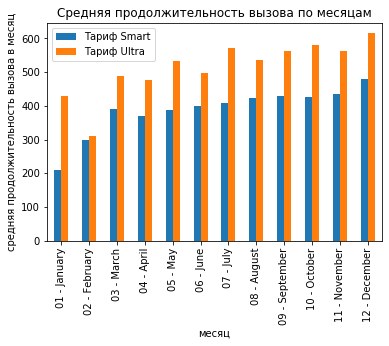

In [13]:
#Функция для вывода описательной статистики и формирования сгруппирорванных по месяцам данных
def create_describe_group(array, value, is_zero_check,tariff):
    #Для начала выведем описательную статистику для всего объема данныхъ
    print("Общая опистельная статистика для "+ value +" для тарифа "+tariff+" с нулевыми значениями")
    print(array[value].describe())
    print("Дисперсия: ", array[value].var())
    #Если в необходимо вывести такую же описательную статистику для сравнения без нулевых значений, то выводим ее
    if is_zero_check == True:
        print("Общая опистельная статистика для "+ value +" для тарифа "+tariff+" без нулевых значений")
        print(array.query(value +' != 0')[value].describe())
        print("Дисперсия: ", array.query(value +' != 0')[value].var())
    #Формируем аналитические значения (сумма, среднее, медиана, стандартное отклонение, дисперсия) для данных, сгруппированных по месяцам и переименовываем колонки
    grouped_array = array.query('sum_duration > 0').groupby('month').agg({value:['sum','mean','median','min','max','std','var']})
    grouped_array.columns = ['sum','mean','median','min','max','std','var']
    print('Помесячные значеня описательной статистики для тарифа '+tariff)
    print(grouped_array)
    return grouped_array

def func_print_bar(array,xlabel,ylabel,title): #Функция для печати столбчатой диаграммы
    bar=array.plot(kind = 'bar')
    bar.set_xlabel(xlabel)
    bar.set_ylabel(ylabel)
    bar.set_title(title)
    plt.legend(['Тариф Smart', 'Тариф Ultra'])
    plt.show()
    
#Вызываем функцию create_describe_group для анализа sum_duartion отдельно для тарифа Smart и Ultra
print('Анализ использованного количества минут для тарифа Smart')
print()
total_smart_grouped_by_month = create_describe_group(total_smart, 'sum_duration', True,'Smart')
print()
print('Анализ использованного количества минут для тарифа Ultra')
print()
total_ultra_grouped_by_month = create_describe_group(total_ultra, 'sum_duration', True,'Ultra')

#Выводим на экран столбчатую диаграмму: средняя продолжительность вызова по месяцам
#формируем объединенную таблицу статистик для обоих тарифов
comare_statistics_by_month = total_smart_grouped_by_month.join(total_ultra_grouped_by_month, lsuffix = '_smart',rsuffix = '_ultra' )
#comare_statistics_by_month.head(5)
#Для анализ среднего значения выделяем отдельные столбцы
compare_mean_duration = comare_statistics_by_month[['mean_smart','mean_ultra']]
#Вызываем функцию печати столбчатой диаграммы
func_print_bar(compare_mean_duration,'месяц','средняя продолжительность вызова в месяц','Средняя продолжительность вызова по месяцам')


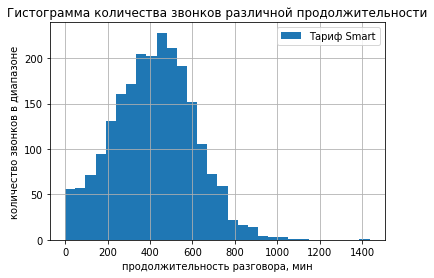

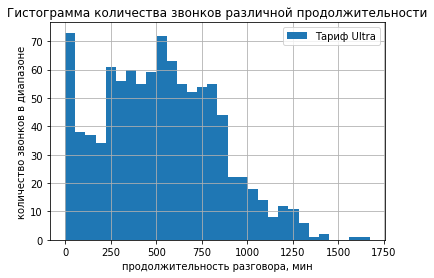

In [14]:
#Построим гистограммы для всех значений
smart_hist = total_smart['sum_duration'].hist(bins = 30)
#smart_hist = total_ultra_grouped_by_month['mean'].hist(bins = 10,)
smart_hist.set_xlabel('продолжительность разговора, мин')
smart_hist.set_ylabel('количество звонков в диапазоне')
smart_hist.set_title('Гистограмма количества звонков различной продолжительности')
smart_hist.legend(['Тариф Smart'])
plt.show()
smart_hist = total_ultra['sum_duration'].hist(bins = 30)
#smart_hist = total_ultra_grouped_by_month['mean'].hist(bins = 10,)
smart_hist.set_xlabel('продолжительность разговора, мин')
smart_hist.set_ylabel('количество звонков в диапазоне')
smart_hist.set_title('Гистограмма количества звонков различной продолжительности')
smart_hist.legend(['Тариф Ultra'])
plt.show()

In [15]:
#посчитаем дополнительную выручку за звонки сверх пакета услуг для каждого тарифа по месяцам
total_activity_extrapay_calls_pivoted = total_activity.pivot_table(index = ['tariff','month'], values = 'calls_extrapay', aggfunc = ['sum','mean','max','std','var'])
print("сводная таблица расчета дополнительнй выручки за звонки сверх пакета услуг для каждого тарифа по месяцам")
total_activity_extrapay_calls_pivoted

сводная таблица расчета дополнительнй выручки за звонки сверх пакета услуг для каждого тарифа по месяцам


sum           mean            max  \
                      calls_extrapay calls_extrapay calls_extrapay   
tariff month                                                         
smart  01 - January            153.0       4.500000          153.0   
       02 - February          2580.0      44.482759          741.0   
       03 - March             7968.0     103.480519          966.0   
       04 - April             9033.0      80.651786          855.0   
       05 - May              11637.0      82.531915          960.0   
       06 - June             14469.0      88.225610         1125.0   
       07 - July             20775.0     103.358209         1017.0   
       08 - August           28680.0     122.042553         1500.0   
       09 - September        33552.0     129.046154         1029.0   
       10 - October          39081.0     132.928571         1515.0   
       11 - November         41568.0     131.544304         1362.0   
       12 - December         68721.0     203.919881         2805.0   
ultra  01 - January              0.0       0.000000            0.0   
       02 - February             0.0       0.000000            0.0   
       03 - March                0.0       0.000000            0.0   
       04 - April                0.0       0.000000            0.0   
       05 - May                  0.0       0.000000            0.0   
       06 - June                 0.0       0.000000            0.0   
       07 - July                 0.0       0.000000            0.0   
       08 - August               0.0       0.000000            0.0   
       09 - September            0.0       0.000000            0.0   
       10 - October              0.0       0.000000            0.0   
       11 - November             0.0       0.000000            0.0   
       12 - December             0.0       0.000000            0.0   

                                 std            var  
                      calls_extrapay calls_extrapay  
tariff month                                         
smart  01 - January        26.239284     688.500000  
       02 - February      119.955436   14389.306715  
       03 - March         209.122767   43732.331852  
       04 - April         188.900980   35683.580357  
       05 - May           181.655111   32998.579331  
       06 - June          181.408238   32908.948788  
       07 - July          200.516037   40206.681045  
       08 - August        245.265716   60155.271686  
       09 - September     240.231833   57711.333769  
       10 - October       267.623261   71622.209898  
       11 - November      246.710398   60866.020253  
       12 - December      364.391987  132781.520348  
ultra  01 - January         0.000000       0.000000  
       02 - February        0.000000       0.000000  
       03 - March           0.000000       0.000000  
       04 - April           0.000000       0.000000  
       05 - May             0.000000       0.000000  
       06 - June            0.000000       0.000000  
       07 - July            0.000000       0.000000  
       08 - August          0.000000       0.000000  
       09 - September       0.000000       0.000000  
       10 - October         0.000000       0.000000  
       11 - November        0.000000       0.000000  
       12 - December        0.000000       0.000000

<b>Вывод о поведении: среднее количество минут разговора</b><br>
Как можно видеть из описательных статистик для тарифов Smart и Ultra, построенных как для полных данных, содержащих нулевые значения, так и для данных, где нулевые значения отсутствуют, значения этих самых описательных статистик для тарифа Smart очень мало отличаются: то есть, на общую картину неотвеченные звонки повлияли очень слабо. С тарифом Ultra дело обстоит несколько иначе. Среднее значение "съехало" аж на 20 единиц, медианное - на 10. Однако все эти значения находятся в пределах пакета услуг по тарифу. в обоих случаях значение третьего квартиля практически одинаковое и входит, опять же, в пакет услуг. Даже самая максмальная продолжительность разговоров (1579 минут) входит в пакет услуг. На сводной таблице расчета дополнительной выручки за звонки сверх пакета услуг очень хорошо видно, что ни один пользователь тарифа Ultra за весь год не принес ни одного рубля за звонки сверх пакета услуг. Возможно, стоит подумать об уменьшении количества минут, включенных в тариф<br>
Пользователи тарифа  Smart принесли за год свыше 278 тыс рублей за звонки сверх пакета услуг, и можно четко видеть в таблице, что эта сумма с каждым месяцем увеличивалась (как и среднее значение (стабильно росло за исключеним пика в марте, связанного с праздниками) при достаточно большом стандартном отклонении (в целом оно тоже росло, однако не очень стабильно): можно сказать, что все больше пользовтелей выходили за рамки пакета услуг и на все большее время. На столбчатой диаграмме "средняя продолжительность вызовов по месяцам" можно четко видеть, что средняя продолжительность вызовов в тарифе Ultra выше, и в обоих тарифах имеет тенденцию к росту, хотя в тарифе smart более плавную.<br>
На гистограмме количества звонков различной продлолжительности для тарифа smart видно, что само по себе распределение очень напоминает нормальное со смещением влево с самым большим пиком в районе (около 450 минут в месяц), при этом для всей выборки среднее и медианное значение (для тарифа Smart) близки  - 417,74 и 421 минута в месяц, что также близко к этому пику. При этом среднеквадратичное отклонение тоже достаточно велико - 190, но это также видно на графике. В таблице "Помесячные значения описательной статистики для тарифа Smart хорошо виден ежемесячный рост средней продолжительности звонков, в декабре это значение достигло 480 (что уже достаточно близко к 500 - лимиту по пакету услуг) с отклонением 197,81 (а максимальное количество использованных минут в декабре -1355). Можно сделать вывод, что пользователи с каждым месяцем более активно пользуются звонками на данном тарифе, что приносит дополнительную прибыль<br>
Гистограмма количества звонков различной продолжительности для тарифа ultra уже не напоминает нормальное распределение. есть несколько пиков, однако, для продолжительности разговоров свыше 850-900 минут наблюдается резкое и значительное уменьшение их количества. Довольно сильно выделяются пики для значений около 0 минут (очень много коротких разговоров) и для значений около 500 - 530 минут, где как раз и есть среднее значение. Среднее квадратичное отклонение для тарифа ultra выше - 317. Это говорит о более широком разбросе продолжительностей разговора, чем для Smart: здесь заметно влияние коротких разговоров и больше длинных. Средняя продолжительность в месяц выше, чем для тарифа Smart и также растет, но пока еще ни разу не достигла лимита по пакету услуг


<h4>Анализ количества сообщений для пользователей каждого тарифа в месяц</h4>

Анализ использованного количества сообщений для тарифа Smart

Общая опистельная статистика для count_messages для тарифа Smart с нулевыми значениями
count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: count_messages, dtype: float64
Дисперсия:  796.9552557301129
Помесячные значеня описательной статистики для тарифа Smart
                    sum       mean  median  min    max        std         var
month                                                                        
01 - January      592.0  17.939394    14.0  0.0   74.0  16.355311  267.496212
02 - February    1397.0  24.086207    20.0  0.0   85.0  21.750809  473.097701
03 - March       2453.0  31.857143    23.0  0.0  110.0  26.804710  718.492481
04 - April       3395.0  30.585586    28.0  0.0  105.0  24.594334  604.881245
05 - May         4762.0  33.773050    30.0  0.0  103.0  27.036845  730.990983
06 - June 

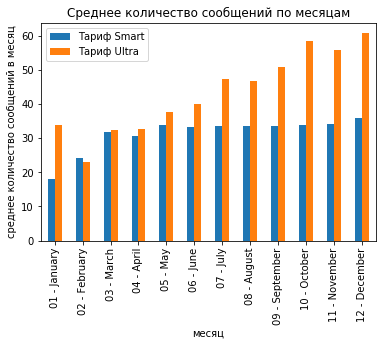

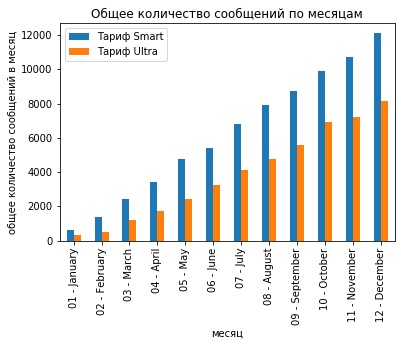

In [16]:
#Вызываем функцию create_describe_group для анализа count_messages отдельно для тарифа Smart и Ultra
print('Анализ использованного количества сообщений для тарифа Smart')
print()
total_smart_grouped_by_month = create_describe_group(total_smart, 'count_messages', False,'Smart')
print()
print('Анализ использованного количества минут для тарифа Ultra')
print()
total_ultra_grouped_by_month = create_describe_group(total_ultra, 'count_messages', False,'Ultra')

#Выводим на экран столбчатую диаграмму: среднее количество сообщений 
#формируем объединенную таблицу статистик для обоих тарифов
comare_statistics_by_month = total_smart_grouped_by_month.join(total_ultra_grouped_by_month, lsuffix = '_smart',rsuffix = '_ultra' )
#comare_statistics_by_month.head(5)
#Для анализ среднего значения выделяем отдельные столбцы
compare_mean_duration = comare_statistics_by_month[['mean_smart','mean_ultra']]
#Вызываем функцию печати столбчатой диаграммы
func_print_bar(compare_mean_duration,'месяц','среднее количество сообщений в месяц','Среднее количество сообщений по месяцам')
compare_mean_duration = comare_statistics_by_month[['sum_smart','sum_ultra']]
#Вызываем функцию печати столбчатой диаграммы
func_print_bar(compare_mean_duration,'месяц','общее количество сообщений в месяц','Общее количество сообщений по месяцам')


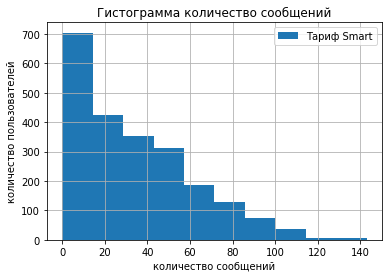

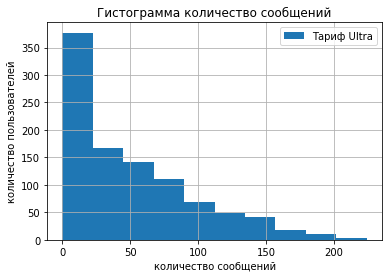

In [17]:
#Построим гистограммы для всех значений
smart_hist = total_smart['count_messages'].hist(bins = 10)
#smart_hist = total_ultra_grouped_by_month['mean'].hist(bins = 10,)
smart_hist.set_xlabel('количество сообщений')
smart_hist.set_ylabel('количество пользователей')
smart_hist.set_title('Гистограмма количество сообщений')
smart_hist.legend(['Тариф Smart'])
plt.show()
smart_hist = total_ultra['count_messages'].hist(bins = 10)
#smart_hist = total_ultra_grouped_by_month['mean'].hist(bins = 10,)
smart_hist.set_xlabel('количество сообщений')
smart_hist.set_ylabel('количество пользователей')
smart_hist.set_title('Гистограмма количество сообщений')
smart_hist.legend(['Тариф Ultra'])
plt.show()

In [18]:
#посчитаем дополнительную выручку за СМС сверх пакета услуг для каждого тарифа по месяцам
total_activity_extrapay_calls_pivoted = total_activity.pivot_table(index = ['tariff','month'], values = 'messages_extrapay', aggfunc = ['sum','mean','max','std','var'])
print("сводная таблица расчета дополнительнй выручки за СМС сверх пакета услуг для каждого тарифа по месяцам")
total_activity_extrapay_calls_pivoted

сводная таблица расчета дополнительнй выручки за СМС сверх пакета услуг для каждого тарифа по месяцам


sum              mean               max  \
                      messages_extrapay messages_extrapay messages_extrapay   
tariff month                                                                  
smart  01 - January                72.0          2.117647              72.0   
       02 - February              321.0          5.534483             105.0   
       03 - March                1158.0         15.038961             180.0   
       04 - April                1233.0         11.008929             165.0   
       05 - May                  2262.0         16.042553             159.0   
       06 - June                 2790.0         17.012195             252.0   
       07 - July                 3489.0         17.358209             261.0   
       08 - August               4410.0         18.765957             252.0   
       09 - September            4434.0         17.053846             258.0   
       10 - October              5286.0         17.979592             267.0   
       11 - November             5835.0         18.465190             222.0   
       12 - December             7494.0         22.237389             279.0   
ultra  01 - January                 0.0          0.000000               0.0   
       02 - February                0.0          0.000000               0.0   
       03 - March                   0.0          0.000000               0.0   
       04 - April                   0.0          0.000000               0.0   
       05 - May                     0.0          0.000000               0.0   
       06 - June                    0.0          0.000000               0.0   
       07 - July                    0.0          0.000000               0.0   
       08 - August                  0.0          0.000000               0.0   
       09 - September               0.0          0.000000               0.0   
       10 - October                 0.0          0.000000               0.0   
       11 - November                0.0          0.000000               0.0   
       12 - December                0.0          0.000000               0.0   

                                    std               var  
                      messages_extrapay messages_extrapay  
tariff month                                               
smart  01 - January           12.347898        152.470588  
       02 - February          20.798292        432.568966  
       03 - March             35.051632       1228.616883  
       04 - April             28.699906        823.684604  
       05 - May               36.049940       1299.598176  
       06 - June              41.501569       1722.380218  
       07 - July              40.810918       1665.531045  
       08 - August            42.442124       1801.333879  
       09 - September         40.322601       1625.912147  
       10 - October           40.879239       1671.112210  
       11 - November          40.190049       1615.240054  
       12 - December          46.987556       2207.830384  
ultra  01 - January            0.000000          0.000000  
       02 - February           0.000000          0.000000  
       03 - March              0.000000          0.000000  
       04 - April              0.000000          0.000000  
       05 - May                0.000000          0.000000  
       06 - June               0.000000          0.000000  
       07 - July               0.000000          0.000000  
       08 - August             0.000000          0.000000  
       09 - September          0.000000          0.000000  
       10 - October            0.000000          0.000000  
       11 - November           0.000000          0.000000  
       12 - December           0.000000          0.000000

<b>Вывод по анализу количества сообщений</b><br>
Как можно видеть из описательной статистики для тарифа Smart среднее количество сообщений пользователя 33.37 с достаточно большим стандартным отклонением - 28. 75% пользователей отправляют не более 51 сообщения в месяц. Как можно видеть на гистограмме, большинство пользователей тарифа отправляет отправляет очень малое количество сообщений. и чем больше сообщений отпавлено, тем меньше таких пользователей. Однако, если посмотреть таблицу помесячной описательной статистики или столбчатую диаграмму, можно увидеть, что с мая по октябрь это значение не слишком росло, рост стал заметен только в ноябре-декабре, что вполне может быть связано с новогодними праздниками, также заметны небольшие пики в марте и мае, связанные с праздниками. В данном пакете было получено около 38,78 тысяч рублей за год дополнительной выручки за пользование СМС сверх пакета услуг, и также заметен ежемесячный рост данного показателя<br>
Для тарифа Ultra среднее значение - 49 (с большим стандатрным отклонением - 47), и с течением месяцев имеет более выраженную тенденцию к росту. Также на гистограмме видно, что большинство пользователей предпочитают отправлять малое количество сообщений. Данный тариф не приносит никакой дополнительной выручки за использование СМС сверх пакета услуг<br>
На столбчатой диаграмме "общее количество сообщений по месяцам" видно, что пользователи тарифа Smart отправляют значительно больше сообщений, чем пользователи тарифа Ultra, хотя и там, и там, видна тенденция к увеличнию. Возможно это связано с тем, что тарифом Smart больше пользуются, например, студенты и молодежь, которой интреснее общаться через СМС. Тариф Ultra больше расчитан на, например, бизнесменов, то есть тех, кому важнее пользоваться звонками, а также у тарифа Smart больше пользователей 

<h4>Анализ объема трафика для каждого пользователя тарифа в месяц</h4>

Анализ использованного интернет - трафика для тарифа Smart

Общая опистельная статистика для sum_mb_used для тарифа Smart с нулевыми значениями
count     2230.000000
mean     16221.910762
std       5886.299627
min          0.000000
25%      12645.250000
50%      16529.000000
75%      20068.000000
max      38610.000000
Name: sum_mb_used, dtype: float64
Дисперсия:  34648523.30069166
Помесячные значеня описательной статистики для тарифа Smart
                      sum          mean   median     min      max  \
month                                                               
01 - January     280647.0   8504.454545   7064.0   541.0  24147.0   
02 - February    673461.0  11611.396552  12572.5   202.0  28523.0   
03 - March      1164537.0  15123.857143  15690.0  2003.0  24990.0   
04 - April      1489303.0  13417.144144  13994.0   529.0  27066.0   
05 - May        2231353.0  15825.198582  16343.0   670.0  29761.0   
06 - June       2581165.0  15835.368098  16107.0   479.0  33927.0   
07 -

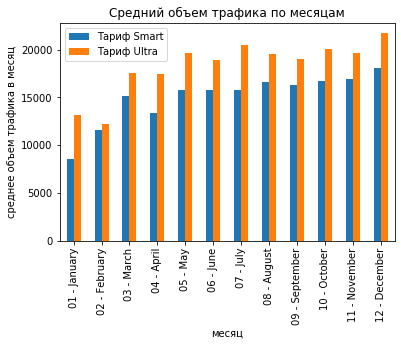

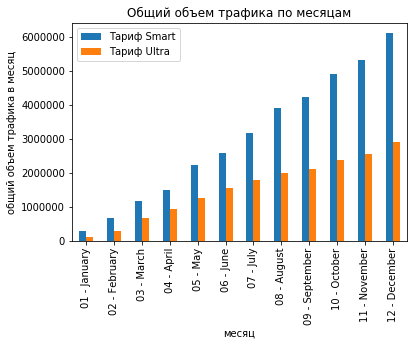

In [19]:
#Вызываем функцию create_describe_group для анализа sum_mb_used отдельно для тарифа Smart и Ultra
print('Анализ использованного интернет - трафика для тарифа Smart')
print()
total_smart_grouped_by_month = create_describe_group(total_smart, 'sum_mb_used', False,'Smart')
print()
print('Анализ использованного интернет - трафика для тарифа Ultra')
print()
total_ultra_grouped_by_month = create_describe_group(total_ultra, 'sum_mb_used', False,'Ultra')

#Выводим на экран столбчатую диаграмму: средний объем трафика
#формируем объединенную таблицу статистик для обоих тарифов
comare_statistics_by_month = total_smart_grouped_by_month.join(total_ultra_grouped_by_month, lsuffix = '_smart',rsuffix = '_ultra' )
#comare_statistics_by_month.head(5)
#Для анализ среднего значения выделяем отдельные столбцы
compare_mean_duration = comare_statistics_by_month[['mean_smart','mean_ultra']]
#Вызываем функцию печати столбчатой диаграммы
func_print_bar(compare_mean_duration,'месяц','среднее объем трафика в месяц','Средний объем трафика по месяцам')
#Для анализ общего значения выделяем отдельные столбцы
compare_mean_duration = comare_statistics_by_month[['sum_smart','sum_ultra']]
#Вызываем функцию печати столбчатой диаграммы
func_print_bar(compare_mean_duration,'месяц','общий объем трафика в месяц','Общий объем трафика по месяцам')

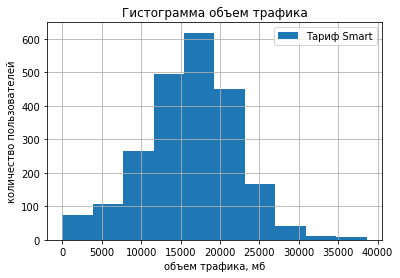

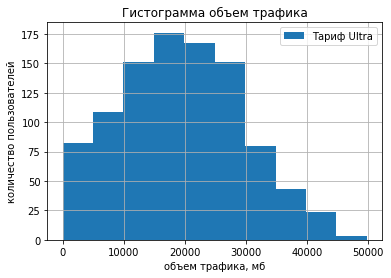

In [20]:
#Построим гистограммы для всех значений
smart_hist = total_smart['sum_mb_used'].hist(bins = 10)
#smart_hist = total_ultra_grouped_by_month['mean'].hist(bins = 10,)
smart_hist.set_xlabel('объем трафика, мб')
smart_hist.set_ylabel('количество пользователей')
smart_hist.set_title('Гистограмма объем трафика')
smart_hist.legend(['Тариф Smart'])
plt.show()
smart_hist = total_ultra['sum_mb_used'].hist(bins = 10)
#smart_hist = total_ultra_grouped_by_month['mean'].hist(bins = 10,)
smart_hist.set_xlabel('объем трафика, мб')
smart_hist.set_ylabel('количество пользователей')
smart_hist.set_title('Гистограмма объем трафика')
smart_hist.legend(['Тариф Ultra'])
plt.show()

In [21]:
#посчитаем дополнительную выручку за интернет-трафик сверх пакета услуг для каждого тарифа по месяцам
total_activity_extrapay_calls_pivoted = total_activity.pivot_table(index = ['tariff','month'], values = 'internet_extrapay', aggfunc = ['sum','mean','max','std','var'])
print("сводная таблица расчета дополнительнй выручки за интернет-трафик сверх пакета услуг для каждого тарифа по месяцам")
total_activity_extrapay_calls_pivoted

сводная таблица расчета дополнительнй выручки за интернет-трафик сверх пакета услуг для каждого тарифа по месяцам


sum              mean               max  \
                      internet_extrapay internet_extrapay internet_extrapay   
tariff month                                                                  
smart  01 - January              4962.0        145.941176            1716.0   
       02 - February            11849.0        204.293103            2571.0   
       03 - March               34642.0        449.896104            1881.0   
       04 - April               31434.0        280.660714            2286.0   
       05 - May                 70271.0        498.375887            2813.0   
       06 - June                81069.0        494.323171            3626.0   
       07 - July                99968.0        497.353234            2761.0   
       08 - August             133409.0        567.697872            3077.0   
       09 - September          130776.0        502.984615            3065.0   
       10 - October            177559.0        603.942177            3403.0   
       11 - November           184338.0        583.348101            4094.0   
       12 - December           245918.0        729.727003            4541.0   
ultra  01 - January                 0.0          0.000000               0.0   
       02 - February              553.0         23.041667             283.0   
       03 - March                2005.0         54.189189             973.0   
       04 - April                2499.0         45.436364             941.0   
       05 - May                  7034.0        104.985075            1927.0   
       06 - June                 6894.0         82.071429            1695.0   
       07 - July                14423.0        158.494505            2124.0   
       08 - August              12965.0        121.168224            2589.0   
       09 - September            7329.0         63.730435            1684.0   
       10 - October             13151.0        106.918699            2793.0   
       11 - November            17524.0        130.776119            1995.0   
       12 - December            24495.0        176.223022            1941.0   

                                    std               var  
                      internet_extrapay internet_extrapay  
tariff month                                               
smart  01 - January          417.446708     174261.754011  
       02 - February         473.333049     224044.175741  
       03 - March            593.089294     351754.910116  
       04 - April            476.373983     226932.172136  
       05 - May              657.921082     432860.150557  
       06 - June             666.352777     444026.023754  
       07 - July             658.751948     433954.129602  
       08 - August           696.753674     485465.681833  
       09 - September        635.268094     403565.551886  
       10 - October          730.760747     534011.269683  
       11 - November         689.895271     475955.484790  
       12 - December         869.572557     756156.431203  
ultra  01 - January            0.000000          0.000000  
       02 - February          78.087732       6097.693841  
       03 - March            186.879765      34924.046547  
       04 - April            175.152713      30678.472727  
       05 - May              395.531077     156444.833107  
       06 - June             298.729026      89239.030981  
       07 - July             422.359283     178387.363858  
       08 - August           376.741979     141934.518603  
       09 - September        221.724633      49161.812662  
       10 - October          372.086619     138448.452352  
       11 - November         384.386899     147753.287846  
       12 - December         458.699533     210405.261495

<b>Вывод по анализу использования трафика для клиентов каждого тарифа в месяц</b><br>
Для тарифа Smart среднее количество используемого трафика 16201.4 Мб, то есть 15,8 Гб., что означает что средний пользователь доплачивает еще 200 рублей сверх заложенного тарифом, причем, можно заметить на столбчатой диаграмме, что значение этой средней величины с каждым месяцем растет (за исключением марта - там пик, вероятно, связанный с мартовскими праздниками), однако с мая месяца этот рост весьма медленный, но есть. Стандартное отклонение - 5879, что также означает немаленький разброс. Гистограмма напоминает нормальное распределение, примечательно, что среднее и медианное значение достаточно близки - 16201 и 16506. То есть в среднем (и даже по месяцам это видно) пользователи (примерно половина) используют примерно тот объем, который предусмотрен пакетом услуг, другая же половина выходит за рамки предоставляемого пакетом услуг трафика, что только в декабре принесло компании 245918 рублей, а за год - около 1205000 рублей. Средний дополнительный платеж также вырос со 145 до 726 рублей в декабре (разница почти в 150 рублей с ноябрем - возможно, рост использования услуг связи перед новогодними праздниками)<br>
Пользователи тарифа Ultra в среднем больше используют интернет-трафик на человека, чем пользователи тарифа Smart. Среднее - 19449,56 Мб, то есть почти 19 Гб, одако, все же, 75% пользователй не выходят за границу в 26 Гб, то ниже предоставляемого в пакете услуг (30 Гб). то есть доля пользователей, которые используют интернет-трафик свыше предоставляемого в пакете услуг здесь гораздо ниже.На гистограмме также видно, что абсолютное большинство пользователей используют до 30 Гб трафика в месяц, а все средние значения по месяцам, начиная с мая, колеблются около 20 Гб. Однако, все-же, есть ряд пользователей, которые используют трафик свыше предоставляемого пакета услуг, такие пользователи принесли компании дополнительно около 108 тыс. рублей за год. 

<h2>Проверка гипотез</h2>

<h3>Проверка гипотезы: средняя выручка пользователей тарифов Smart и Ultra различаются</h3>

<b>Нулевая гипотезу H0:</b> средняя выручка пользователей тарифов Smart и Ultra одинаковы (для проведения статистического теста нулевая гипотеза должна быть о равенстве)<br>
<b>Альтернативная гипотеза H1:</b> средняя выручка пользователей тарифов Smart и Ultra не одинаковы <br><br>
Если в процессе проведения статистического теста мы отвергаем H0, то тогда принимаем гипотезу H1 (не отвергаем)

In [22]:
#выделим отдельно выручку пользователей каждого тарифа
smart_proficit = total_smart['total_proficit']
ultra_proficit = total_ultra['total_proficit']
#Посчитаем дисперсию обеих выборок:
print('Дисперсия smart_proficit:',smart_proficit.var())
print('Дисперсия ultra_proficit:',ultra_proficit.var())
#зададим уровень статистической значимости
alpha = 0.05
#проводим статистический тест проверки гипотезы о равенстве средних двух генеральных совокупностей
#Дисперсии выборок очень сильно отличаются, поэтому задаем значение параметра equal_var = False
results = st.ttest_ind(smart_proficit,ultra_proficit,equal_var = False)
print('P-значение: ',results.pvalue)
if(results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу о равенстве средней выручки пользователей тарифов Smart и Ultra')
else:
    print('Не удалось отвергнуть нулевую гипотезу о равенстве средней выручки пользователей тарифов Smart и Ultra')

Дисперсия smart_proficit: 620389.3968919683
Дисперсия ultra_proficit: 126827.12268613381
P-значение:  3.6576240086349756e-296
Отвергаем нулевую гипотезу о равенстве средней выручки пользователей тарифов Smart и Ultra


<b>Вывод</b><br>
Ранее мы видели, что в имеющихся выборках выручка в тарифе Ultra заметно ниже, чем в тарифе Samrt. Проведем статистический тест и проверим гипотезу о том, что средняя выручка в тарифах Ultra и Smart одинакова (H0 - нулевая гипотеза). По условию задачи нам необходимо проверить гипотезу о различии этих величин, но для проведения статистического теста должна быть сформулирована нулевая гипотеза об их равенстве. Тогда гипотеза об их различии - это альтернативная гипотеза H1. Если мы отвергаем нулевую гипотезу, то мы сможем принять альтернативную.
Для проверки сравним полученное после проведения теста значение pvalue с уровнем статистичекой значимости. Если это значение окажется ниже alpha, то можно будет говорить, что с крайне малой вероятностью (значение pvalue) полученный результат оказался случайным
Значение P-value значительно меньше уровня статистической значимости, значит, с вероятностью многократно меньше полученный результат оказался случайным. Значит, мы имеем все основания отвергнуть нулеввую гипотезу о равенстве средней выручки в тарифах и принять альтернативную гипотезу об их различии.

<h3>Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</h3>

<b>Сформулируем нулевую гипотезу H0:</b> средняя выручка пользователей из Москвы равна средней выруче пользователей из других регионов<br>
<b>Альтернативная гипотеза H1:</b> Средняя выручка пользователей из Москвы отличается от среднй выручки пользователей из других регионов<br><br>
Если в процессе проведения статистического теста мы отвергаем H0, то тогда принимаем гипотезу H1 (не отвергаем)

In [23]:
#Формулируем нулевую гипотезу: средняя выручка пользователей из Москвы равна средней выручке пользователей из лругих регионов
moscow_proficit = total_activity_short.query('city == "москва"')['total_proficit']
other_cities_proficit = total_activity_short.query('city != "москва"')['total_proficit']
#Посчитаем дисперсию обеих выборок:
print('Дисперсия smart_proficit:',moscow_proficit.var())
print('Дисперсия ultra_proficit:',other_cities_proficit.var())
#зададим критический уровень статистической значимости
alpha = 0.05
#проводим статистический тест проверки гипотезы о равенстве средних двух генеральных совокупностей
#Дисперсии выборок очень сильно отличаются, поэтому задаем значение параметра equal_var = False
results = st.ttest_ind(moscow_proficit,other_cities_proficit,equal_var = False)
print('P-значение: ',results.pvalue)
if(results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу о равенстве средней выручки пользователей из Москвы и других городов')
else:
    print('Не удалось отвергнуть нулевую гипотезу о равенстве средней выручки пользователей  из Москвы и других городов')

Дисперсия smart_proficit: 547244.6105712217
Дисперсия ultra_proficit: 630435.4968187138
P-значение:  0.4516693741165556
Не удалось отвергнуть нулевую гипотезу о равенстве средней выручки пользователей  из Москвы и других городов


<b>Вывод</b><br>
Сфрмулируем нулевую гипотезу: "Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов". Тогда альтернативная гипотеза будет зучать следующим образом: "Средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов".
Проведем тест. Уровень значимости полученного реузультата - 0.41. То есть с вероятностью 41% можно сказать, что полученный результат "Не удалось отвергнуть нулевую гипотезу" неслучаен. Это очень большое значение. Таким образом, мы не можем отвергнуть нулевую гипотезу о равенстве средней выручки пользователей из Москвы от выручки пользователей из других регионов. Соответственно, мы не можем потвердить альтернативную гипотезу "редняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов".

<h2>Общий вывод</h2>

В процессе проведения анализа было проанализировано поведение клиентов каждого тарифа, выручка от каждого тарифа, а также проализированы гипотезы о влиянии среднию объем выручки от клиента его тарифа и региона проживания. 
Какие выводы были сделаны:
1. В процессе предподготовки данных было обнаружено, что зарегистрировано достаточно большое количество строк с нулевым значением объема использованного трафика (около 19,5 тыс записей). Необходимо понять природу данных цифр, возможно, это связано с плохим соедниением - пользователь пытался выйти в интернет, но не получилось, и это могло быть связано с качеством работы оборудования. Это необходимо выяснить и проверить
2. Пользователи трифа Ultra в среднем используют больше минут разговора, чем пользователи тарифа Smart. Однако, общее количество минут, которые использовали пользователи тарифа Smart превышает общее количество минут, использованных пользователями тарифа Ultra, что может быть связано с тем, что пользователей тарифа smart больше,и, что самое главное, пользователи тарифа Smart с каждым месяцем все чаще выходят за количество минут, предусмотренных пакетом услуг. В течение всего анализируемого года 75% пользователей тарифа Smart превышали месячную продолжительность разговоров не более чем на 45 минут, тем не менее можно наблюдать, что с каждым месяцем среднее и максимальное значения проолжительности разговоров растут (с учетом пиков разной высоты в марте, мае и декабре). В целом за год пользователи тарифа Smart только из этой выборки принесли компании свыше 278 тыс. рублей за использование минут сверх пакета услуг. В то время как пользователи тарифа Ultra ни разу не вышли за пределы своего пакета и не принесли ни одного дополнительного рубля
3. Ситуация с сообщениями абсолютно аналогичная: пользователи тарифа Smart используют в среднем меньше сообщений, чем пользователи тарифа Ultra, однако пользователи тарифа Smart выходят за лимиты пакета услуг, что приносит компании дополнительную прибыль (сумма в течение года небольшая - 38,78 тыс. руб., однако на сегодняшний день СМС - не самый популярный вид связи в принципе), причем среднее значение количества использованных сообщений также растет ежемесячно. Пользователи тарифа Ultra не принесли компании ни одного рубля за использовние СМС сверх пакета услуг.
4. Интернет на сегодня - самый популярный вид связи, так что здесь пользователи обоих тарифов принесли компании дополнительную прибыль. Только пользователи тарифа smart принесли около 1205000 рублей, а пользователи тарифа Ultra - 108 тыс. руб. На диаграммах и аналитических таблицах видно, что примерно половина пользователей тарифа Smart использует трафик в рамках пакета услуг, другая же половина использует больше, иногда значительно. В то время как 75% пользователей тарифа Ultra использует только 26 Гб из 30 Гб, предусмотренных пакетом услуг. То есть очень малое количество пользователй выходят за лимит
5. На аналитических данных по выборке можно было видеть, что общая выручка по тарифу Smart значительно превышает общую выручку по тарифу Ultra, однако средняя выручка по тарифу Ultra (как в целом, так и по месяцам) почти в 2 раза превышает выручку по тарифу Smart. Гипотеза о равенстве средней выручки для тарифов Ultra и Smart была опровергнута, то есть, основываясь на имеющихся данных, мы можем предполагать, что разные значения средних выручек для тарифов smart и ultra имеют место быть и для генеральной совокупности.
6. Гипотеза о равенстве средних выручек для пользователей из Москвы и других регионов не была опровергнута, то есть, основываясь на имеющихся у нас данных, мы не можем предполагать что выручка пользователей из Москвы каким-то значительным образом отлчается от выручки пользователей из других регионов. 
<br>
<br>
Тариф Ultra приносит меньше выручки в общем объеме, но средняя выручка на пользователя почти в 2 раза выше средней выручки для пользователя тарифом Smart, но и количество пользователей тарифом smart более чем в 2 раза выше, чем для тарифа Ultra (351 против 149). То есть, увеличив количество пользователей тарифа Ultra, мы тем самым увеличим и общую выручку компании. Соответственно, есть смысл вложиться в рекламный бюджет именно для тарифа Ultra. При этом, если учесть, что есть пользователи, которые очень сильно выходят за лимиты предоставляемого пакета услуг тарифа Smart, возможно, стоит предложить и им перейти на новый тариф. Тариф smart можно также продолжать рекламировать, но сделать бюджет чуть меньше, возможно, избрать чуть более дешевые способы рекламы, и, возможно, ориантировать рекламу на студентов и молодежь. 
Также можно предложить задуматься о создании некоторых промежуточных тарифов: с пакетом услуг, чуть меньшим, чем для Ultra и большим, чем для Smart. Возможно это помогло бы привлечь клиентов, которым тариф Ultra слишком большой и дорогой, а тариф Smart кажется невыгодным, что при правильном ценообразовании может увеличить прибыль компании.